In [137]:
# %pip install pandas --quiet
# %pip install seaborn --quiet
# %pip install matplotlib --quiet

In [138]:
import pandas as pd

file_path = "../data/turkish_law_dataset.csv"
df = pd.read_csv(file_path)
print("🧾  Columns:", df.columns.tolist())
df.head()

🧾  Columns: ['soru', 'cevap', 'veri türü', 'kaynak', 'context', 'Score']


,soru,cevap,veri türü,kaynak,context,Score
0,"Anayasa, Türk Vatanı ve Milletinin ebedi varlı...","Anayasa, Türk Vatanı ve Milletinin ebedi varlı...",hukuk,Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,8
1,"Anayasa, Türkiye Cumhuriyetinin hangi milliyet...","Anayasa, Türkiye Cumhuriyetinin kurucusu olan ...",hukuk,Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,8
2,"Anayasa, Türkiye Cumhuriyetini hangi konumda t...","Anayasa, Türkiye Cumhuriyetini dünya milletler...",hukuk,Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,9
3,"Anayasa, Türkiye Cumhuriyetinin hangi hedefler...","Anayasa, Türkiye Cumhuriyetinin ebedi varlığın...",hukuk,Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,9
4,"Anayasa, egemenliğin kime ait olduğunu nasıl b...","Anayasa, egemenliğin kayıtsız şartsız Türk Mil...",hukuk,Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,10


In [139]:
print("\n⚖️ Data Types:\n", df['veri türü'].unique())


⚖️ Data Types:
 ['hukuk']


**Since the "veri türü" column is only contains one value, we need to drop it.**

In [140]:
df.drop(columns=['veri türü'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,soru,cevap,kaynak,context,Score
0,"Anayasa, Türk Vatanı ve Milletinin ebedi varlı...","Anayasa, Türk Vatanı ve Milletinin ebedi varlı...",Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,8
1,"Anayasa, Türkiye Cumhuriyetinin hangi milliyet...","Anayasa, Türkiye Cumhuriyetinin kurucusu olan ...",Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,8
2,"Anayasa, Türkiye Cumhuriyetini hangi konumda t...","Anayasa, Türkiye Cumhuriyetini dünya milletler...",Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,9
3,"Anayasa, Türkiye Cumhuriyetinin hangi hedefler...","Anayasa, Türkiye Cumhuriyetinin ebedi varlığın...",Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,9
4,"Anayasa, egemenliğin kime ait olduğunu nasıl b...","Anayasa, egemenliğin kayıtsız şartsız Türk Mil...",Türkiye Cumhuriyeti Anayasası,BAŞLANGIÇ [5]\n\n \n\nTürk Vatanı ve Milletini...,10


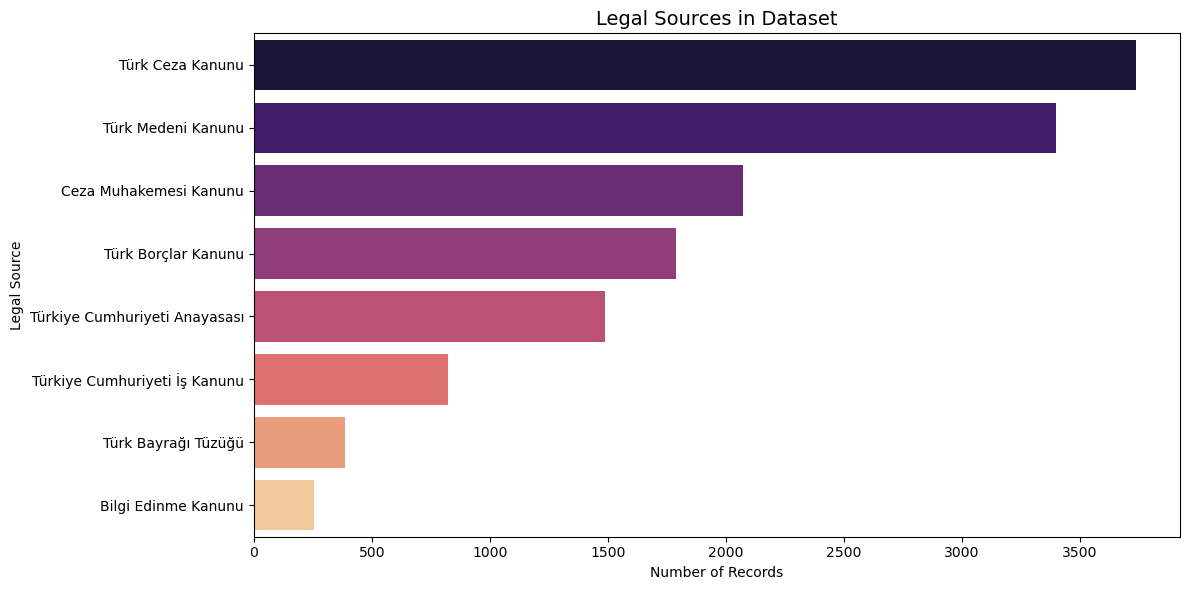

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count top legal sources
source_counts = df['kaynak'].value_counts(dropna=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=source_counts.values, y=source_counts.index, palette="magma")

plt.title("Legal Sources in Dataset", fontsize=14)
plt.xlabel("Number of Records")
plt.ylabel("Legal Source")
plt.tight_layout()
plt.show()

### **🧠 Understanding the `Score` Column in Turkish Law Dataset**

This dataset includes a `Score` column that indicates the **quality and relevance** of each QA (Question-Answer) pair. This field is particularly useful when filtering or weighting training data for machine learning applications.

#### **📌 What Does the `Score` Represent?**

The `Score` is a numeric value that reflects how well the **answer matches the context and legal intent** of the question. Higher values indicate better quality, clarity, and legal soundness.

Typical values observed:
- `10`: Excellent — highly accurate, clear, and legally valid response
- `8–9`: Strong — well-matched and relevant
- `6–7`: Fair — acceptable, but may lack precision
- `≤5`: Weak or noisy (very few samples in the dataset)

Special values:
- `-1`: Belongs to the `"Safety"` category (used in safety-specific training)
- `-2`: Indicates samples that were **not scored**

> 💡 Scores are assigned based on expert or algorithmic assessment of answer quality and alignment with context.

---

In [142]:
score_counts = df['Score'].value_counts().sort_index()

print("📊 Number of Records per Score Value:\n")
for score, count in score_counts.items():
    print(f"Score {score}: {count} records")

📊 Number of Records per Score Value:

Score -1: 17 records
Score 0: 4 records
Score 1: 16 records
Score 2: 44 records
Score 3: 39 records
Score 4: 22 records
Score 5: 47 records
Score 6: 168 records
Score 7: 1094 records
Score 8: 7866 records
Score 9: 3784 records
Score 10: 853 records


In [143]:
score_zero_df = df[df['Score'] == 0]

print(f"📄 Number of records with Score = 0: {len(score_zero_df)}")

for i, row in score_zero_df.iterrows():
    print(f"""### ❓ QA Example with `Score = 0` — Record {i+1}

**🔹 Question:**  
{row['soru']}

**🔸 Answer:**  
{row['cevap']}

---
""")

📄 Number of records with Score = 0: 4
### ❓ QA Example with `Score = 0` — Record 2460

**🔹 Question:**  
Avukatın şüpheli veya sanıkla görüşme, ifade alma veya sorgu süresince yanında olma hakkı ne zaman engellenebilir?

**🔸 Answer:**  
Avukatın şüpheli veya sanıkla görüşme, ifade alma veya sorgu süresince yanında olma hakkı hiçbir zaman engellenemez veya kısıtlanamaz.

---

### ❓ QA Example with `Score = 0` — Record 3623

**🔹 Question:**  
Direnme üzerine Yargıtay Ceza Genel Kurulunca verilen kararlara karşı ne yapılabilir?

**🔸 Answer:**  
Direnme üzerine Yargıtay Ceza Genel Kurulunca verilen kararlara karşı direnilemez.

---

### ❓ QA Example with `Score = 0` — Record 7618

**🔹 Question:**  
Yazılı şekil dışındaki geçerlilik şekilleri için de yazılı şekil kuralı uygulanır mı?

**🔸 Answer:**  
Yazılı şekil kuralı, yazılı şekil dışındaki geçerlilik şekilleri hakkında da uygulanır.

---

### ❓ QA Example with `Score = 0` — Record 12602

**🔹 Question:**  
Kaçan hükümlü veya tutuklunun k

#### **🧹 Removal of `Score = 0` Records**

During data review, QA pairs with a `Score = 0` were manually inspected. These samples were found to be:

- ❌ Misleading or factually incorrect
- ❌ Contradictory or confusing in their wording
- ❌ Lacking legal clarity or proper justification

Although few in number, these entries can introduce **noise or bias** into training or retrieval systems. Therefore, all `Score = 0` records have been removed from the dataset to ensure higher consistency and reliability.

In [144]:
df = df[df['Score'] != 0].copy()

In [145]:
# Filter Score = -1 (safety category)
safety_df = df[df['Score'] == -1].reset_index(drop=True)

# Show how many records we have
print(f"🔐 Number of safety records: {len(safety_df)}")

# Preview first few
safety_df[['soru', 'cevap']].head()

🔐 Number of safety records: 17


,soru,cevap
0,Cumhurbaşkanı yardımcıları nasıl atanır ve gör...,"Cumhurbaşkanı yardımcıları, milletvekili seçil..."
1,Olağanüstü halin kaldırılmasına kim karar verir?,Olağanüstü halin kaldırılmasına Türkiye Büyük ...
2,Yasama ile ilgili hükümler ne zaman yürürlüğe ...,Yasama ile ilgili hükümler ilk milletvekili ge...
3,"Kanuni hakim güvencesi, herkesin kanunen tabi ...","Anayasa, hiç kimsenin kanunen tabi olduğu mahk..."
4,Özel teşebbüslerin milli ekonominin gereklerin...,"Devlet, özel teşebbüslerin milli ekonominin ge..."


In [146]:
# Filter safety records
safety_df = df[df['Score'] == -1].reset_index(drop=True)

# Generate Markdown format for each row
for i, row in safety_df.iterrows():
    print(f"""### 🛡️ Safety QA Pair {i+1}

**🔹 Question:**  
{row['soru']}

**🔸 Answer:**  
{row['cevap']}

---
""")

### 🛡️ Safety QA Pair 1

**🔹 Question:**  
Cumhurbaşkanı yardımcıları nasıl atanır ve görevden alınır?

**🔸 Answer:**  
Cumhurbaşkanı yardımcıları, milletvekili seçilme yeterliliğine sahip kişiler arasından Cumhurbaşkanı tarafından atanır ve görevden alınır.

---

### 🛡️ Safety QA Pair 2

**🔹 Question:**  
Olağanüstü halin kaldırılmasına kim karar verir?

**🔸 Answer:**  
Olağanüstü halin kaldırılmasına Türkiye Büyük Millet Meclisi karar verir.

---

### 🛡️ Safety QA Pair 3

**🔹 Question:**  
Yasama ile ilgili hükümler ne zaman yürürlüğe girer?

**🔸 Answer:**  
Yasama ile ilgili hükümler ilk milletvekili genel seçimi sonucunun ilanı ile birlikte yürürlüğe girer.

---

### 🛡️ Safety QA Pair 4

**🔹 Question:**  
Kanuni hakim güvencesi, herkesin kanunen tabi olduğu mahkemeden başka bir merci önüne çıkarılmamasını sağlar. Anayasa bu ilkeyi nasıl düzenler?

**🔸 Answer:**  
Anayasa, hiç kimsenin kanunen tabi olduğu mahkemeden başka bir merci önüne çıkarılamayacağını ve bir kimseyi kanunen tab

### **🛡️ Interpreting `Score = -1` (Safety Category) in Turkish Law Dataset**

The `Score = -1` label in this dataset indicates QA pairs marked under the **"Safety" category**. These entries are not necessarily low-quality, but rather sensitive or high-risk in nature.

#### **🔍 Observations from Manual Review**

- Some records cover **structural constitutional matters** (e.g., "How is the state of emergency lifted?")
- Others involve **legally and ethically sensitive topics**, such as:
  - Child sexual abuse
  - Reşit olmayanla ilişki (relations with minors)
  - Criminal law boundaries

These entries are likely flagged due to **potential misuse**, **ethical ambiguity**, or **legal liability** in automated systems.

---

#### **🧠 Why Are These Records Important?**

- ❗ They **highlight edge cases** where LLMs must act with caution
- 🔐 Can be used to **train or guide models to avoid unsafe completions**
- 📛 May expose **societal, legal, or moral boundaries** in public datasets

---

#### **💡 Potential Uses for `Score = -1` Data**

| Use Case | Purpose |
|----------|---------|
| 🧱 Guardrail Design | Develop model prompts that deflect or defer ethically dangerous answers |
| 📚 Safety Testing Set | Evaluate how models respond to high-risk queries |
| 🎯 Targeted Fine-Tuning | Fine-tune a safety-aware assistant on how to respond to such queries |
| 🧠 Embedding Index | Use them as a reference to semantically detect risky input at runtime |

---

#### **✅ Conclusion**

The `Score = -1` entries are not noise — they are **contextually or ethically flagged** data points that should be handled separately with care. Instead of discarding them, it's valuable to:

- Review them manually
- Treat them as a **distinct subset**
- Leverage them for **ethical model behavior shaping**

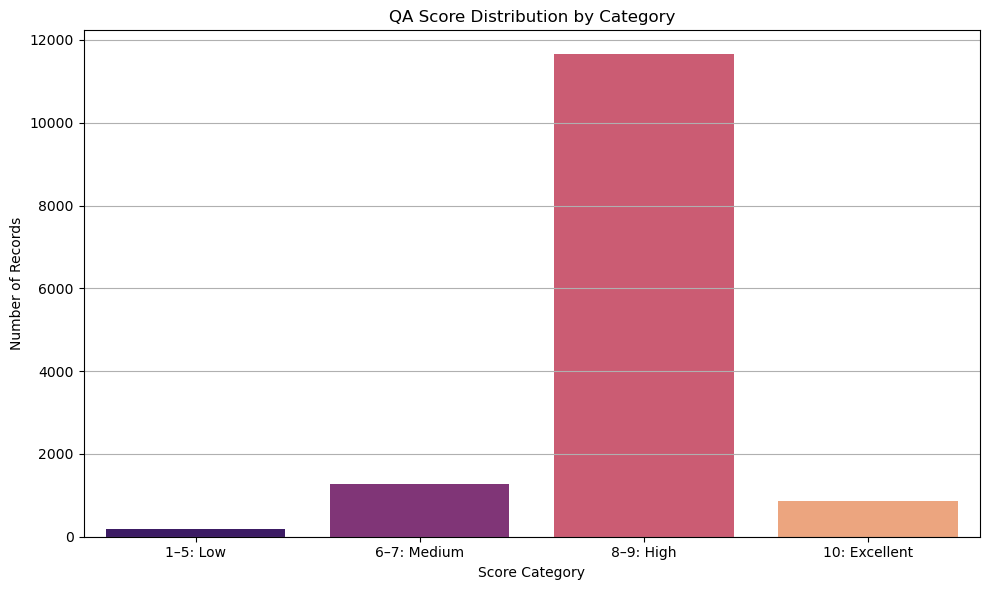

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define categorization function
def categorize_score(score):
    if score <= 5:
        return "1–5: Low"
    elif score <= 7:
        return "6–7: Medium"
    elif score <= 9:
        return "8–9: High"
    elif score == 10:
        return "10: Excellent"
    else:
        return "Other"

# Create a temporary category Series for plotting
score_categories = df['Score'].apply(categorize_score)

# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=score_categories, order=[
    "1–5: Low", "6–7: Medium", "8–9: High", "10: Excellent"
], palette="magma")

plt.title("QA Score Distribution by Category")
plt.xlabel("Score Category")
plt.ylabel("Number of Records")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

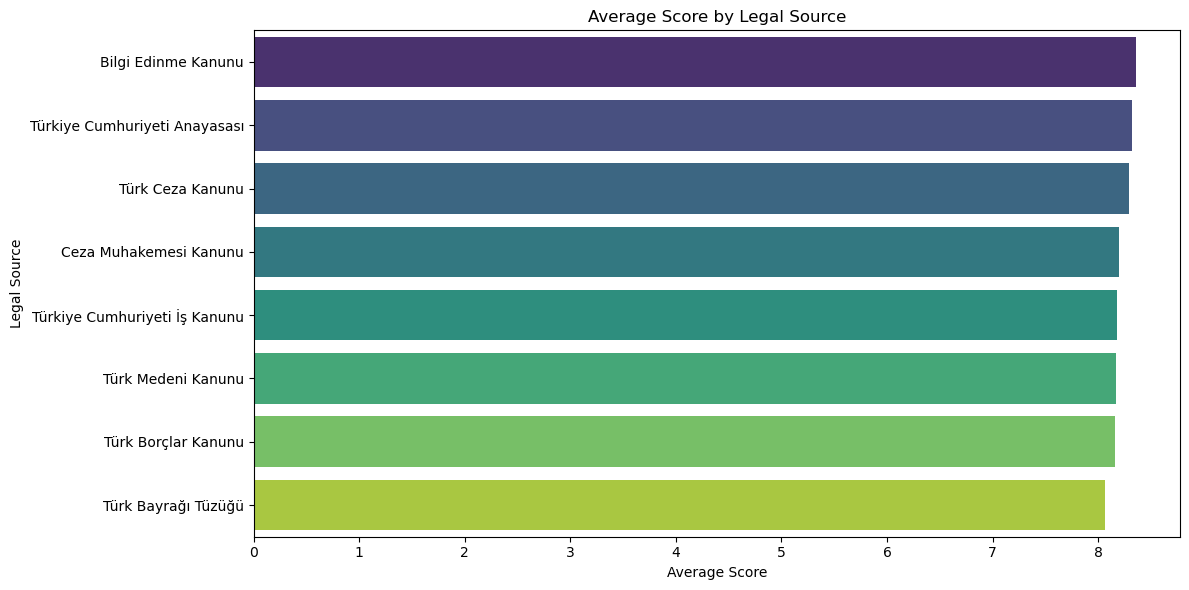

In [148]:
# Calculate average score per 'kaynak'
avg_scores = df.groupby('kaynak')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")

plt.title("Average Score by Legal Source")
plt.xlabel("Average Score")
plt.ylabel("Legal Source")
plt.tight_layout()
plt.show()

#### **🧹 Filtering Low-Quality QA Pairs from Dataset**

To ensure high data quality, we remove QA pairs with a `Score` value of **5 or lower**, as they are considered weak or noisy

This filtering step improves the clarity and reliability of the dataset for both fine-tuning and embedding tasks.

- ✅ `Score > 5` → retained (medium to excellent quality)
- ❌ `Score ≤ 5` → dropped
- 🚫 `Score = -1` and `-2` are kept, as they represent special categories (e.g. "Safety" or "Unscored")

In [149]:
# Drop low-quality rows (Score ≤ 5), but keep -1 and -2
df = df[(df['Score'] > 5) | (df['Score'] < 0)].copy()

print(f"✅ Filtered dataset shape: {df.shape}")
print("✅ Columns:")
print(df.columns.tolist())

✅ Filtered dataset shape: (13782, 5)
✅ Columns:
['soru', 'cevap', 'kaynak', 'context', 'Score']
